In [18]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read in the CSV file as a Pandas DataFrame
spread_df = pd.read_csv(
    Path("../Resources/stock_data.csv")
)
del spread_df["date"]
# Review the DataFrame
spread_df.head()

close    volume  open  high   low   returns  hi_low_spread
0   3.61  18193730  3.55  3.73  3.53  0.028490           0.20
1   3.82  16233940  3.55  3.90  3.55  0.058172           0.35
2   4.26  21236940  3.90  4.30  3.83  0.115183           0.47
3   4.32  16369170  4.36  4.39  4.11  0.014085           0.28
4   4.31  15075630  4.45  4.45  4.12 -0.002315           0.33

In [19]:
# Create a a list to store inertia values
k_inertia = []
# Create a a list to store the values of k
k_list = []

# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the home_sales_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(spread_df)
    k_inertia.append(model.inertia_)
    k_list.append(k)
    
# Create a dictionary that holds the list values for k and inertia



C:\Users\benjamenalford\.conda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  "KMeans is known to have a memory leak on Windows "


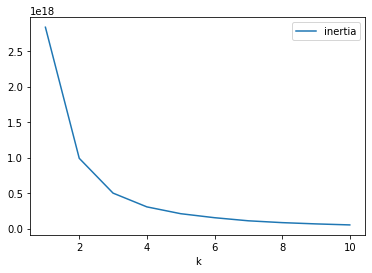

In [20]:
# Create a DataFrame using the elbow_data dictionary
df = pd.DataFrame({"k":k_list,"inertia":k_inertia})

# Plot the DataFrame
df.plot(x="k",y="inertia")

In [21]:
df.hvplot(x="k",y="inertia")

:Curve   [k]   (inertia)

In [22]:
model = KMeans(n_clusters=3)

In [24]:
model.fit(spread_df)

KMeans(n_clusters=3)

In [25]:
predictions = model.predict(spread_df)

In [26]:
spread_df['classification'] = predictions

In [27]:
spread_df.head(5)

close    volume  open  high   low   returns  hi_low_spread  classification
0   3.61  18193730  3.55  3.73  3.53  0.028490           0.20               0
1   3.82  16233940  3.55  3.90  3.55  0.058172           0.35               0
2   4.26  21236940  3.90  4.30  3.83  0.115183           0.47               0
3   4.32  16369170  4.36  4.39  4.11  0.014085           0.28               0
4   4.31  15075630  4.45  4.45  4.12 -0.002315           0.33               0

In [31]:
spread_df.hvplot(kind="scatter", x="volume", y="classification")

:Scatter   [volume]   (classification)

In [43]:
spread_df.loc[spread_df['classification']==0]

close    volume   open   high    low   returns  hi_low_spread  \
0      3.61  18193730   3.55   3.73   3.53  0.028490           0.20   
1      3.82  16233940   3.55   3.90   3.55  0.058172           0.35   
2      4.26  21236940   3.90   4.30   3.83  0.115183           0.47   
3      4.32  16369170   4.36   4.39   4.11  0.014085           0.28   
4      4.31  15075630   4.45   4.45   4.12 -0.002315           0.33   
...     ...       ...    ...    ...    ...       ...            ...   
2486  23.25  34636110  23.30  23.62  23.04 -0.001717           0.58   
2505  27.85  40957900  28.21  28.38  27.66  0.002159           0.72   
2506  27.33  40739300  27.80  27.84  26.96 -0.018671           0.88   
2509  27.68  39814790  27.60  27.88  27.34  0.006912           0.54   
2510  28.18  36400850  27.62  28.23  27.39  0.018064           0.84   

      classification  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
2486               0  
2505               0  
2506               0  
2509               0  
2510               0  

[1848 rows x 8 columns]

In [45]:
print(predictions)

[0 0 0 ... 1 1 1]
